In [ ]:
# Imports etc.

# Sessão prática 6: Busca não informada

## 1. Preambulo 

Investiga como funcionam as struturas `set` em Python, particulamente, se tivermos dois conjuntos  $a$ e $b$ que acontece quando fazemos  $a - b$? 
Que acontece se usamos a função `add` num conjunto?

Investiga também a função `pop` aplicada a uma estrutura de tipo lista. Que acontece quando fazemos `pop()` numa lista? E quando fazemos `pop(0)`? Qual a diferença?



# Sets

[Info](https://www.w3schools.com/python/python_sets.asp)


Sets are used to store multiple items in a single variable.

Set is one of 4 built-in data types in Python used to store collections of data, the other 3 are List, Tuple, and Dictionary, all with different qualities and usage.

A set is a collection which is unordered, unchangeable*, and unindexed.

In [14]:
# create a set example
set1 = {1, 2, 3, 4, 5}

set2 = {3, 4, 5, 6, 7}


# Subtrair um set de outro retorna um novo set com os elementos que estão no primeiro set, mas não no segundo set.

set_sub_1 = set1 - set2
print(set_sub_1) # {1, 2}

set_sub_2 = set2 - set1
print(set_sub_2) # {6, 7}





{1, 2}
{6, 7}


In [12]:
set_soma = set1.add(set2)
print(set_soma) # unhashable type: 'set'

TypeError: unhashable type: 'set'

## 2. Exercício 1
Usa estes conceitos para implementar DFS e BFS considerando o percurso no grafo que considera só os nodos visitados (e não os caminhos parciais)

Usa o grafo embaixo para testar o teu código

## Exercício 2

Implementar a versão final de DFS / BFS que funciona com a queue que mantém os caminhos parcais, como estudamos na sessão teórica requer de alguns truques.
Existem várias maneiras válidas para implementar estes algoritmos de busca informada.

Investiga como é que funciona o `yield` em Python
Investiga como poderias usar chamadas recursivas em Python

Usando estes recursos tenta implementar uma versão simples de busca não informada que possa fazer DFS ou BFS.

# BFS 

Nós expandidos sao adicionados a uma pilha, logo os que foram adicionados primeiro vao ser expandidos a seguir, isto e, antes dos expandidos mais recentes.


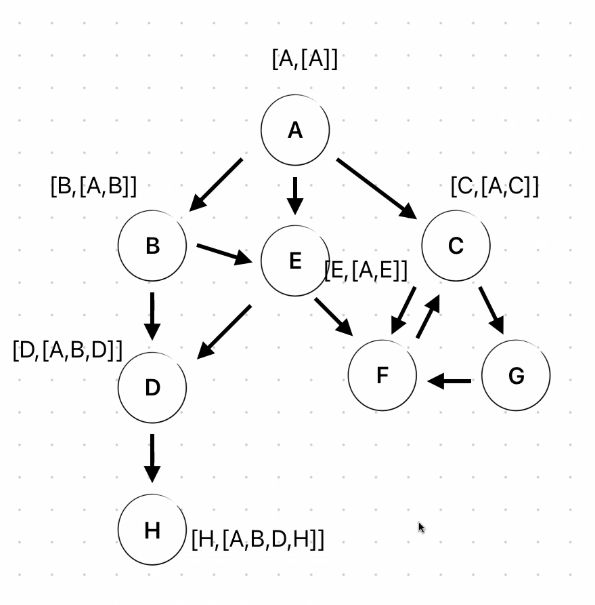

# DFS

nos expandidos aparecem no inicio da fila logo vao ser os proximos expandidos

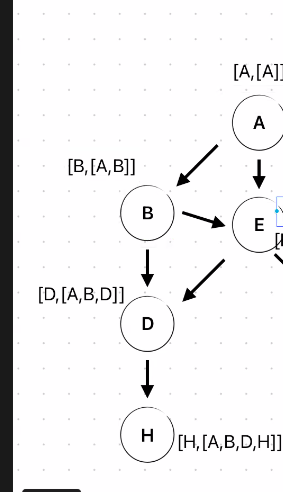

# Basic Search Algorithm
    [1] g #search graph as adjacency list
    [2] init #initial node from where we begin searching
    [3] goal #destination node we want to find
    [4] q = [init] #queue, data structure we use to traverse de search graph
    [5] while q: #this is valid in python: while q is not empty
        [6] h = Head(q) #remember this is always the first element
        [7] r = Rest(q) #remember this is always a list of remaining elements
        [8] if h == goal:
            [9] exit 😅
        [10] else:
            [11] e = Expand(h) #get nodes directly reachable from h (list)
            [12] q = Combine(e, r) #basically q contains the elements of e and r

# What about loops?
	[1] g #search graph as adjacency list
	[2] init #initial node from where we begin searching
	[3] goal #destination node we want to find
	[4] q = [init] #queue, data structure we use to traverse de search graph
	[5] v = [ ]
	[6] while q: #this is valid in python: while q is not empty
		[7] h = Head(q) #remember this is always the first element
		[8] r = Rest(q) #remember this is always a list of remaining elements
			[9] if h == goal:
				[10] exit 😅
			[11] else:
				[12] v.append(h)
				[13] e = Expand(h) - v #get nodes directly reachable from h
				[14] q = Combine(e, r) #put all past non visited nodes and future

# BFS

In [3]:
g = {
    'A': ['B', 'C', 'E'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H'],
    'E': ['D', 'F'],
    'F': ['C'],
    'G': ['F'],
    'H': []
}

def bfs(graph, init = 'A', goal = 'H'):
    
	queue = [(init, [init])] # inicia a fila com o nó inicial como uma lista de tuplas (nó, caminho)
	
	while queue:
		(node, visited) = queue.pop(0) # remove o primeiro elemento da fila

		for next_node in graph[node]: # para cada nó adjacente ao nó atual -> 'node': [nos adjacentes ao nó atual]]
			if next_node in visited:
				continue
			if next_node == goal:	
				print("Encontro")
				print("Queue: ", queue)
				return visited + [next_node] # se o nó adjacente for o nó objetivo, retorna o caminho	
			else:
				queue.append((next_node, visited + [next_node])) # adiciona o nó adjacente à fila com o caminho percorrido até ele
				
		print(queue) # vai imprimindo a fila a cada iteração

bfs(g)
#print(bfs(g))

[('B', ['A', 'B']), ('C', ['A', 'C']), ('E', ['A', 'E'])]
[('C', ['A', 'C']), ('E', ['A', 'E']), ('D', ['A', 'B', 'D']), ('E', ['A', 'B', 'E'])]
[('E', ['A', 'E']), ('D', ['A', 'B', 'D']), ('E', ['A', 'B', 'E']), ('F', ['A', 'C', 'F']), ('G', ['A', 'C', 'G'])]
[('D', ['A', 'B', 'D']), ('E', ['A', 'B', 'E']), ('F', ['A', 'C', 'F']), ('G', ['A', 'C', 'G']), ('D', ['A', 'E', 'D']), ('F', ['A', 'E', 'F'])]
Encontro
Queue:  [('E', ['A', 'B', 'E']), ('F', ['A', 'C', 'F']), ('G', ['A', 'C', 'G']), ('D', ['A', 'E', 'D']), ('F', ['A', 'E', 'F'])]


['A', 'B', 'D', 'H']

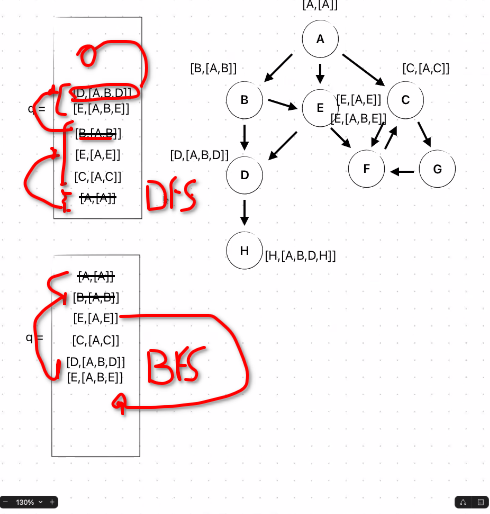

# DFS

In [5]:
from collections import	deque

g = {
    'A': ['B', 'C', 'E'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H'],
    'E': ['D', 'F'],
    'F': ['C'],
    'G': ['F'],
    'H': []
}

def dfs(graph, init = 'A', goal = 'H'):

	queue = [(init, [init])] # inicia a fila com o nó inicial como uma lista de tuplas (nó, caminho)

	print(queue)

	while 1:
		(node, visited) = queue.pop(0)
		for next_node in graph[node]:
			if next_node in visited:
				continue
			if next_node==goal:
				print("Got It!")
				return visited + [node]
			else:
				queue.insert(0, (next_node, visited + [next_node]))
		print(queue)

dfs(g)



[('A', ['A'])]
[('E', ['A', 'E']), ('C', ['A', 'C']), ('B', ['A', 'B'])]
[('F', ['A', 'E', 'F']), ('D', ['A', 'E', 'D']), ('C', ['A', 'C']), ('B', ['A', 'B'])]
[('C', ['A', 'E', 'F', 'C']), ('D', ['A', 'E', 'D']), ('C', ['A', 'C']), ('B', ['A', 'B'])]
[('G', ['A', 'E', 'F', 'C', 'G']), ('D', ['A', 'E', 'D']), ('C', ['A', 'C']), ('B', ['A', 'B'])]
[('D', ['A', 'E', 'D']), ('C', ['A', 'C']), ('B', ['A', 'B'])]
Got It!


['A', 'E', 'D', 'D']